## Principal component Analysis

### 2.1 Example Dataset

In [57]:
import scipy.io
import sys
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import math
import imageio.v2 as imageio
from mpl_toolkits.mplot3d import Axes3D
from ipynb.fs.full.Kmeans import computeCentroids
from ipynb.fs.full.Kmeans import kMeansInitCentroids
from ipynb.fs.full.Kmeans import draw_line
from ipynb.fs.full.Kmeans import plotProgresskMeans
from ipynb.fs.full.Kmeans import runkMeans

In [4]:
data = scipy.io.loadmat('ex7data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [6]:
X = data['X']
X.shape

(50, 2)

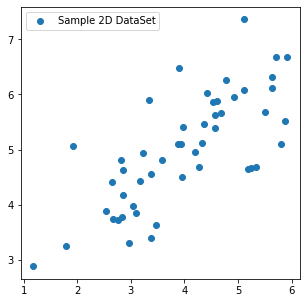

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], label='Sample 2D DataSet')
plt.legend()
plt.show()

### 2.2 Implementing PCA

In [8]:
def featureNormalize(X):
    
    mu = np.mean(X, axis=0)
    X_meanSub = X - mu
    
    sigma = np.std(X_meanSub, axis=0)
    X_norm = X_meanSub / sigma
    
    return X_norm, mu, sigma
    

In [9]:
# Normalise X
X_norm, mu, sigma = featureNormalize(X)

###### Instructions: You should first compute the covariance matrix. Then, you should use the "svd" function to compute the eigenvectors and eigenvalues of the covariance matrix. 
- We often need to center our data points by making our mean coincide with origin of our data space. we can obtain a centered data matrix by subtracting mean from data points which is done in ***featurenormalize.m***

- We are doing a featurenormalize before in which we are subtracting the mean from X thats why 1/m X'X is giving the covariance matrix.

__S is eigen values , U eigenvector.
Sigma = (X' * X)./m__

In [10]:
def pca(X):
    
    m, n = X.shape
    Sigma = 1/m * np.dot(X.T, X)
    
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S
    

In [11]:
U, S = pca(X_norm)

In [12]:
print(U)
print(S)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.73553038 0.26446962]


In [13]:
def drawLine(p1, p2, color):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color)

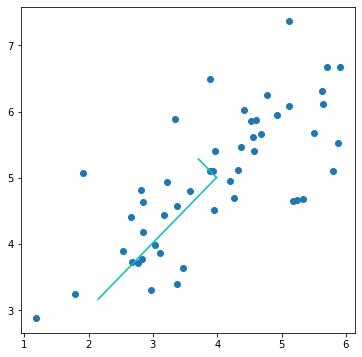

In [14]:
#Multiply eigen value with corresponding eigenvector to get the vector and then plot.
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='Sample 2D DataSet')
drawLine(mu, mu + 1.5 * S[0] * U[:,0].T, 'c')
drawLine(mu, mu + 1.5 * S[1] * U[:,1].T, 'c')
plt.show()
plt.close()

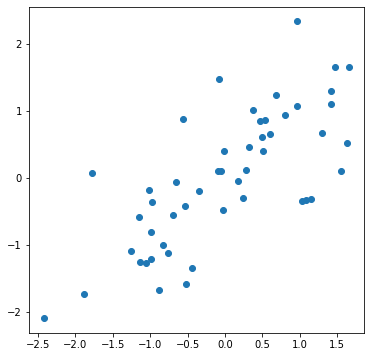

In [15]:
#Plot the normalized dataset
plt.figure(figsize=(6,6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], label='Sample 2D DataSet normalized')


### 2.3 Dimensionality Reduction with PCA

>> You should now implement the projection step to map the data onto the 
first k eigenvectors. The code will then plot the data in this reduced dimensional space.  
>>This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it.

##### 2.3.1 Projecting the data onto the principal components or first K eigen vectors -(note -  X should be X_norm)

In [16]:
def projectData(X, U, K):
    
    m, n = X.shape
    Z = np.zeros([m,K])
    U_reduce = U[:,0:K]
    Z = np.dot(X, U_reduce)
    return Z
    

In [17]:
K = 1
Z = projectData(X_norm, U, K)

In [18]:
print('Projection of the first example', Z[0])
print('\nthis value should be about 1.481274');

Projection of the first example [1.49631261]

this value should be about 1.481274


##### 2.3.2 Reconstructing an approximation of the data

In [19]:
def recoverData(Z, U, K):
    
    U_reduce = U[:, 0:K]
    X_rec = np.dot(Z, U_reduce.T)
    return X_rec

In [20]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example:', X_rec[0])
print('this value should be about  -1.047419 -1.047419')

Approximation of the first example: [-1.05805279 -1.05805279]
this value should be about  -1.047419 -1.047419


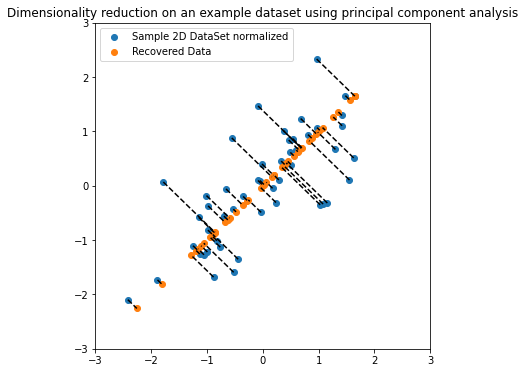

In [21]:
#Draw lines connecting the projected points to the original points

plt.figure(figsize=(6,6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], label='Sample 2D DataSet normalized')
plt.scatter(X_rec[:, 0], X_rec[:, 1], label='Recovered Data')

for i in range(X_norm.shape[0]):
     drawLine(X_norm[i,:], X_rec[i,:], 'k--')
 
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('Dimensionality reduction on an example dataset using principal component analysis')
plt.legend()
plt.show()

### 2.4 Face Image Dataset

In [22]:
data = scipy.io.loadmat('ex7faces.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [23]:
X = data['X']
X.shape

(5000, 1024)

In [24]:
#Display the first 100 faces in the dataset
#The dataset ex7faces.mat contains a dataset3 X of face images, each 32 × 32 in grayscale 
#https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
#https://www.educative.io/answers/what-is-a-subplots-in-matplotlib
def displayData(X):
    
    m,n = X.shape # n = 1024  = 32 * 32 (100 examples, so m = 100)
    
    image_width = int(math.sqrt(n)) # 32
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    plt.figure(figsize=(6,6))
    
    for i in range(m):
        image = X[i]
        image = np.reshape(image, (image_width, image_width), order='F')
        plt.subplot(display_rows, display_cols, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
    

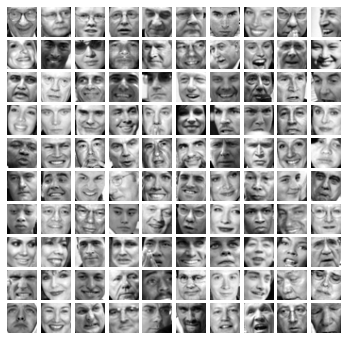

In [25]:
displayData(X[:100])

#### 2.4.1 PCA on Faces

In [26]:
# Normalise X
X_norm, mu, sigma = featureNormalize(X)

In [27]:
# Run PCA
U, S = pca(X_norm)

In [28]:
X_norm.shape

(5000, 1024)

In [29]:
U.shape #Principal components. 

(1024, 1024)

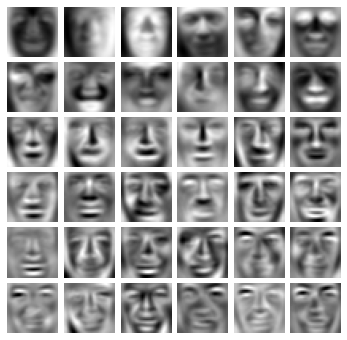

In [30]:
#simply display principal components (note these are not original images, 
#you need to project to get that, which will be done in next step.)
displayData(U[:, 0:36].T) 

#### 2.4.2 Dimensionality Reduction

In [31]:
K = 100
Z = projectData(X_norm, U, K)
print("Projected data sise" , Z.shape)

Projected data sise (5000, 100)


In [32]:
# Recover face imaged from reduced data set Z
K = 100
X_rec = recoverData(Z, U, K)
X_rec.shape

(5000, 1024)

Face images from Normalized data:


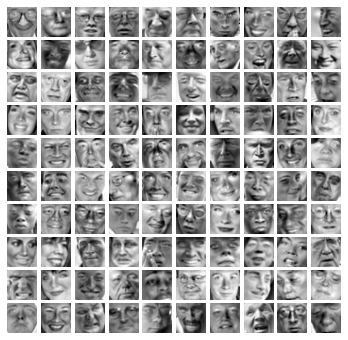

Reconstructed images from only k eigenfaces


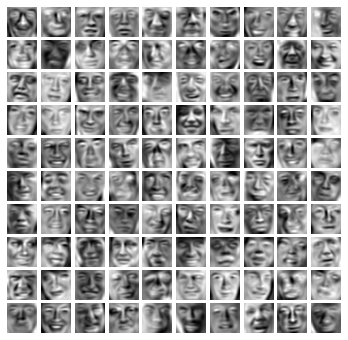

In [33]:
print('Face images from Normalized data:')
displayData(X_norm[:100])

print('Reconstructed images from only k eigenfaces')
displayData(X_rec[:100])

### 2.5 Optional (ungraded) exercise: PCA for visualization

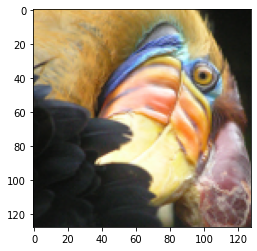

In [34]:
A = imageio.imread('bird_small.png')
plt.imshow(A)
plt.show()

K-Means iteration 1 10
K-Means iteration 2 10
K-Means iteration 3 10
K-Means iteration 4 10
K-Means iteration 5 10
K-Means iteration 6 10
K-Means iteration 7 10
K-Means iteration 8 10
K-Means iteration 9 10
K-Means iteration 10 10


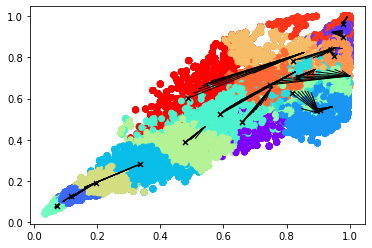

In [35]:
A = A / 255
X = np.reshape(A, [A.shape[0] * A.shape[1], 3])
K = 16 
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K);
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [78]:

#https://www.geeksforgeeks.org/change-data-type-of-given-numpy-array/
sel = (np.floor(np.random.rand(1000, 1) * X.shape[0]) + 1).astype(int).flatten()
sel = sel - 1

In [79]:
#  Setup Color Palette
#https://stackoverflow.com/questions/45394868/matplotlibs-equivalent-of-matlabs-hsvm
R = np.linspace(0,1, K+1)
palette = plt.cm.hsv(R)
palette

array([[1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.37058861, 0.        , 1.        ],
       [1.        , 0.74117721, 0.        , 1.        ],
       [0.88823418, 1.        , 0.        , 1.        ],
       [0.51764558, 1.        , 0.        , 1.        ],
       [0.14705697, 1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.22353062, 1.        ],
       [0.        , 1.        , 0.59411689, 1.        ],
       [0.        , 1.        , 0.96470316, 1.        ],
       [0.        , 0.66470845, 1.        , 1.        ],
       [0.        , 0.29411985, 1.        , 1.        ],
       [0.07646876, 0.        , 1.        , 1.        ],
       [0.44705736, 0.        , 1.        , 1.        ],
       [0.81764597, 0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.81176542, 1.        ],
       [1.        , 0.        , 0.44117682, 1.        ],
       [1.        , 0.        , 0.09375   , 1.        ]])

In [80]:
colors = palette[idx[sel].flatten().astype(int)]

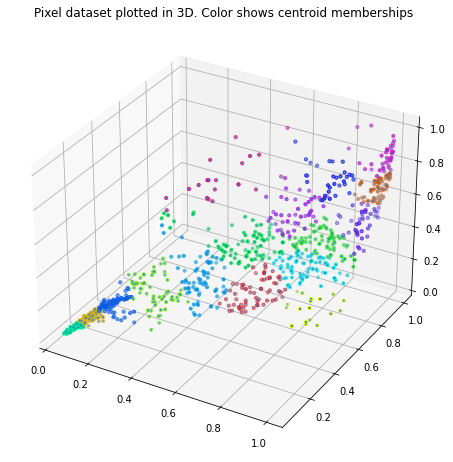

In [87]:
# Visualise in 3D
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], s=10,  edgecolors=colors)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

In [89]:
# Use PCA to project this cloud to 2D for visualization
X_norm, mu, sigma = featureNormalize(X)
[U, S] = pca(X_norm)
Z = projectData(X_norm, U, 2)

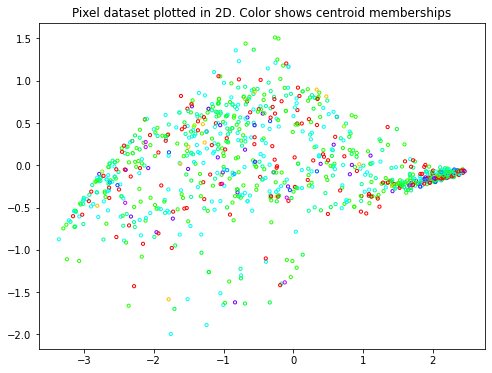

In [94]:
colors = np.array(palette[idx.flatten().astype(int), :])
plt.figure(figsize=(8,6))
plt.scatter(Z[sel, 0], Z[sel, 1], s=10, facecolors='none', edgecolors=colors)
plt.title('Pixel dataset plotted in 2D. Color shows centroid memberships')
plt.show()